In [29]:
from fastai.vision.all import *
from fastbook import *

In [6]:
path = untar_data(URLs.PETS)

In [7]:
# look at the data 
path.ls()

(#2) [Path('/home/jworkman/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images')]

In [8]:
(path/"images").ls()

(#7393) [Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/boxer_7.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_113.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/saint_bernard_137.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/samoyed_114.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/keeshond_31.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/Persian_103.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/samoyed_101.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/american_bulldog_216.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/British_Shorthair_130.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/Abyssinian_73.jpg')...]

In [11]:
fname = (path/"images").ls()[1]

In [12]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['yorkshire_terrier']

In [15]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")       

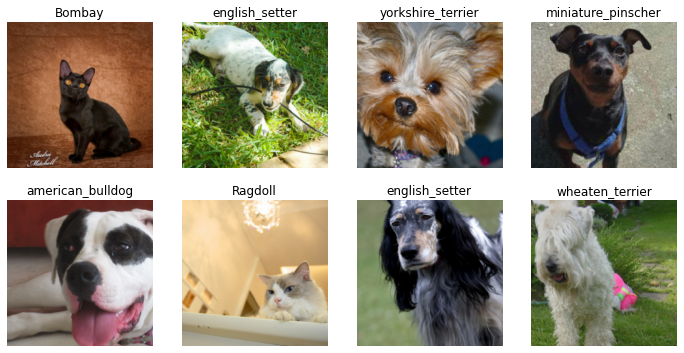

In [19]:
dls.show_batch(nrows=2,ncols=4)

In [21]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
#pets1.summary(path/'images')

In [22]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jworkman/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.491176,0.372621,0.124493,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.506309,0.344557,0.101489,00:43
1,0.338980,0.254432,0.089986,00:43


In [23]:
x,y = dls.one_batch()

In [24]:
y

TensorCategory([25, 24, 14, 10, 30, 19,  9,  1, 29, 17, 15,  9, 24, 33, 26,  2, 15, 24,
        32, 13, 10, 27, 27,  9, 13, 36, 18, 35, 22, 18, 17, 17,  3, 30, 20, 32,
         3, 24, 13, 15, 34,  4,  9,  4, 19, 22, 35,  7,  3, 14, 32,  3, 33, 21,
        35, 13, 23,  5,  1,  7, 23, 32, 32, 17], device='cuda:0')

In [26]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([6.3789e-08, 4.9344e-09, 7.6546e-08, 5.4935e-09, 1.5082e-09, 1.1816e-09,
        5.2115e-08, 6.1103e-09, 7.4920e-09, 1.2762e-07, 3.1694e-07, 2.8574e-08,
        2.2299e-09, 2.6045e-08, 1.5787e-08, 5.6094e-08, 1.5950e-07, 7.1283e-09,
        5.3904e-08, 2.1048e-08, 3.3089e-07, 1.2526e-05, 3.2491e-09, 3.1494e-09,
        5.3688e-07, 9.9997e-01, 9.8710e-09, 1.1796e-05, 1.4024e-08, 1.0736e-07,
        8.8551e-07, 7.7847e-09, 2.0333e-09, 3.6055e-08, 8.7316e-08, 6.0019e-07,
        2.9641e-08])

In [27]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

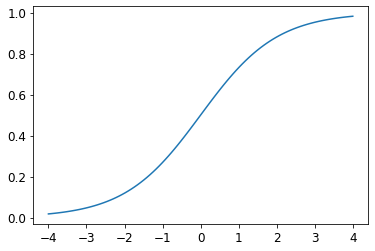

In [31]:
plot_function(torch.sigmoid, min=-4,max=4)

In [32]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [33]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [35]:
(acts[:,0] - acts [:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [36]:
def softmax ( x ): return exp ( x ) / exp ( x ) . sum ( dim = 1 , keepdim = True )